# Data Cleaning

# Change working directory

In [19]:
import os

# Define the correct file path
file_path = "C:\\Users\\conor\\Desktop\\DA course\\SuperstoreSales"

# Move up only if currently in the 'jupyter_notebooks' folder
if "jupyter_notebooks" in os.getcwd():
    os.chdir(file_path)
    print(f"Changed working directory to: {os.getcwd()}")
else:
    print(f"Already in the correct directory: {os.getcwd()}")

Already in the correct directory: C:\Users\conor\Desktop\DA course\SuperstoreSales


# Import libraries I'll be using

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Section 1

# Load the dataset

In [21]:
# Loading the dataset using the correct path, had to find correct encoding from other projects that used the same dataset on kaggle
df = pd.read_csv("C:\\Users\\conor\\Desktop\\DA course\\SuperstoreSales\\Dataset\\Superstore.csv", encoding='ISO-8859-1')

# Showing basic info first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Section 2

# Converting data types

In [22]:
# Converting order date and ship date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Verifying it worked
df[['Order Date', 'Ship Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 156.3 KB


# Section 3

Removing unnecesary columns

In [23]:
# Removes unnecessary columns
df.drop(columns=['Row ID', 'Postal Code', 'Customer Name', 'Country', 'Product Name', 'Customer ID'], inplace=True)

# Verifying the columns were removed
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


Ethical Considerations and Data Privacy  

Although this dataset was publicly available, ethical concerns arise when handling customer data.  

- Both Customer Name and Postal Code were included in the dataset, which could lead to privacy issues if misused.  
- Since these columns were not necessary for the analysis, they were removed to protect individual privacy.  

Responsible Data Handling in Analytics

Apart from removing personally identifiable information, ethical data handling in data analytics also includes:  

- Transparency: Ensuring data is used responsibly and for legitimate business purposes.  
- Bias Prevention: Avoiding misleading conclusions by ensuring data is fairly analyzed.  
- Data Security: Preventing unauthorized access to sensitive customer data.  

Legal and Ethical Compliance  

In the real world, businesses must comply with data privacy regulations such as:  

- GDPR (General Data Protection Regulation) – Governs personal data protection in the EU.    

Since this dataset contained customer purchase information, if this were real-world data, businesses would need to ensure compliance with legal frameworks and ethical standards before using it for decision-making.  

By following these practices, we ensure that data is handled responsibly and ethically, preventing potential misuse or privacy violations.  



# Section 4

Handling Outliers

In [24]:
# Generate summary statistics for numerical columns
num_cols = ["Sales", "Profit", "Discount"]

df[num_cols].describe()



,Sales,Profit,Discount
count,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203
std,623.245101,234.260108,0.206452
min,0.444000,-6599.978000,0.000000
25%,17.280000,1.728750,0.000000
50%,54.490000,8.666500,0.200000
75%,209.940000,29.364000,0.200000
max,22638.480000,8399.976000,0.800000



🔹 Outliers Detected Using IQR:
Sales       199
Profit      200
Discount      0
dtype: int64


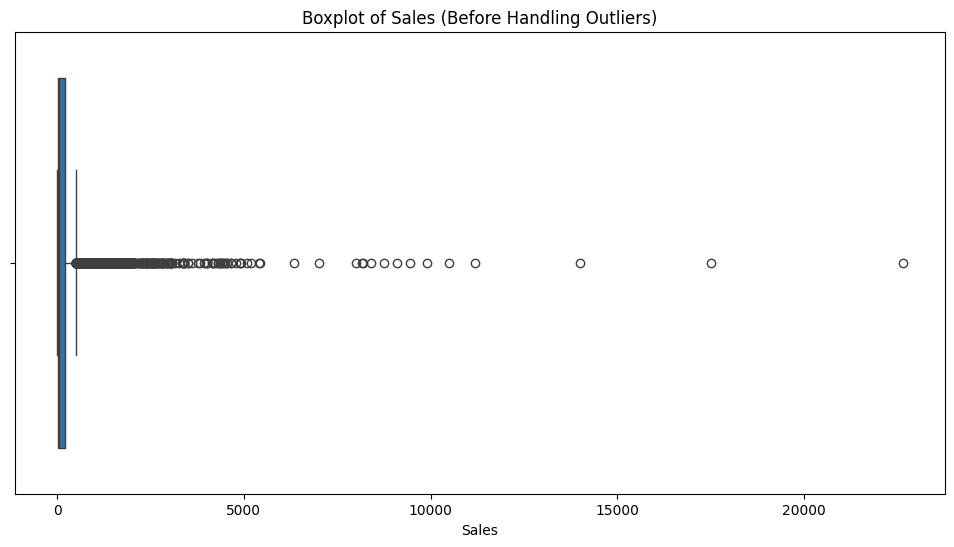

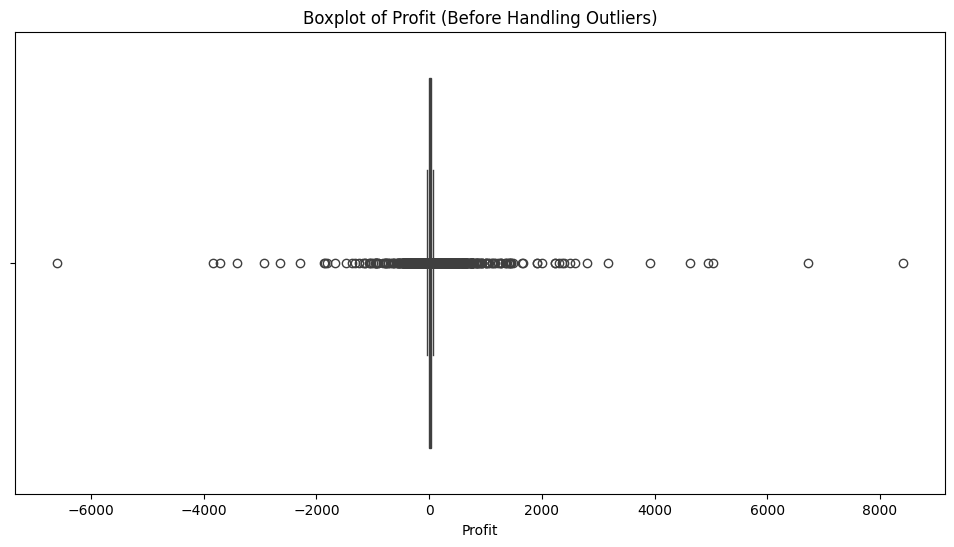

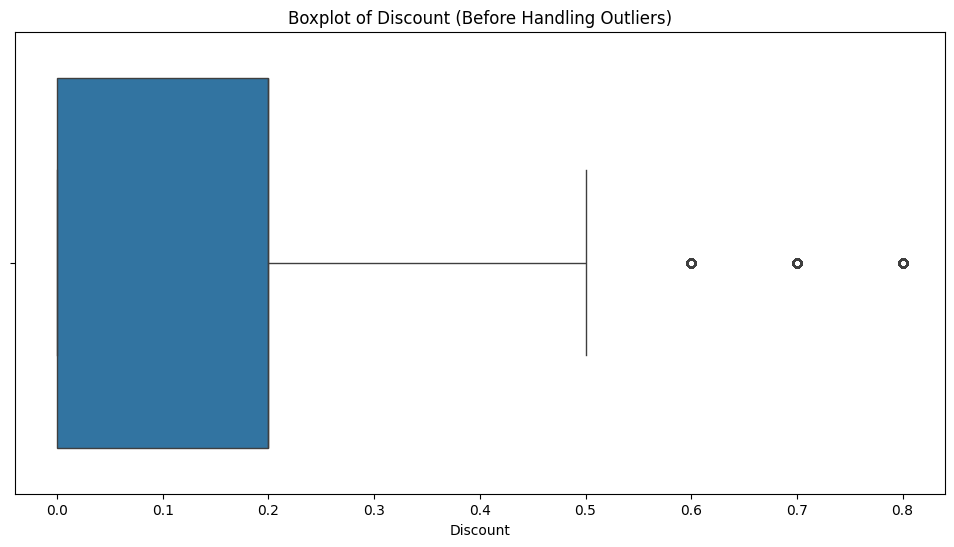

In [25]:
# Calculate 1st and 99th percentiles for each numerical column (used this method instead of IQR+-1.5 method shown in LMS as it affected the data way too much)
lower_bound = df[num_cols].quantile(0.01) 
upper_bound = df[num_cols].quantile(0.99) 

# Count the number of outliers in each column
outlier_counts = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()
print("\n🔹 Outliers Detected Using IQR:")
print(outlier_counts)

# Step 4: Visualize outliers using boxplots before handling
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"Boxplot of {col} (Before Handling Outliers)")
    plt.show()

In [26]:
# Change extreme values at IQR limits to upper/lower bounds instead of removing them
for col in num_cols:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Summary stats after dealing with outliers
df[num_cols].describe()

,Sales,Profit,Discount
count,9994.000000,9994.000000,9994.000000
mean,209.365508,26.307032,0.156203
std,394.795901,97.564856,0.206452
min,2.286000,-319.264953,0.000000
25%,17.280000,1.728750,0.000000
50%,54.490000,8.666500,0.200000
75%,209.940000,29.364000,0.200000
max,2481.694600,580.657882,0.800000


             Sales       Profit     Discount
count  9994.000000  9994.000000  9994.000000
mean    209.365508    26.307032     0.156203
std     394.795901    97.564856     0.206452
min       2.286000  -319.264953     0.000000
25%      17.280000     1.728750     0.000000
50%      54.490000     8.666500     0.200000
75%     209.940000    29.364000     0.200000
max    2481.694600   580.657882     0.800000


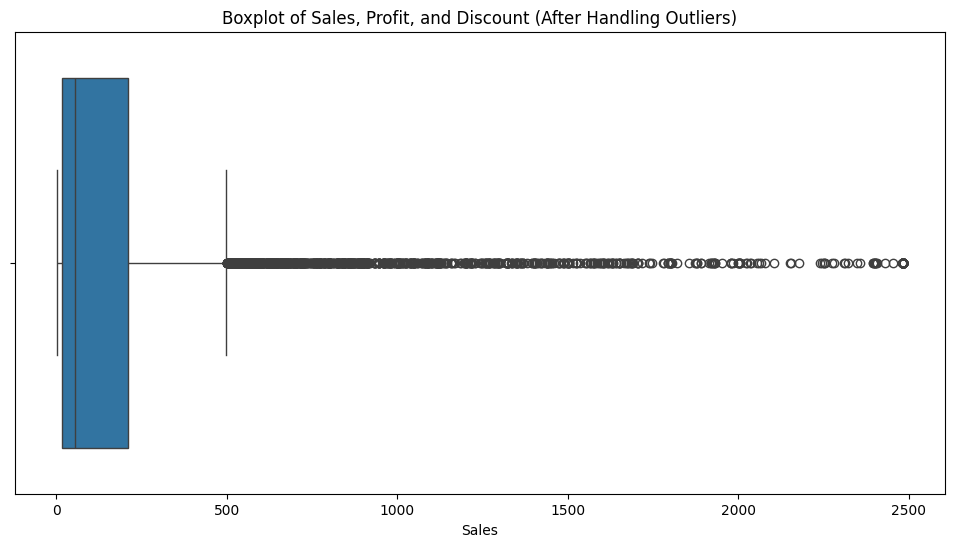

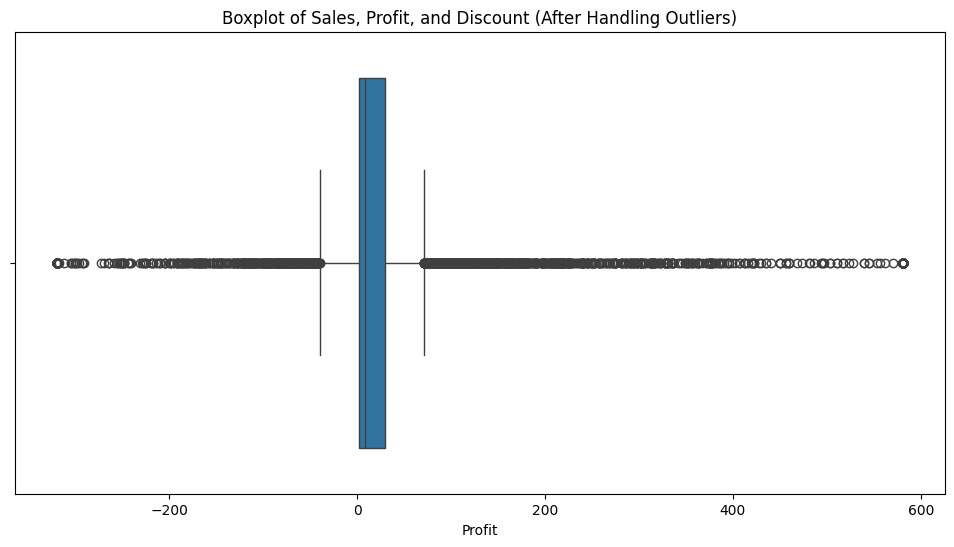

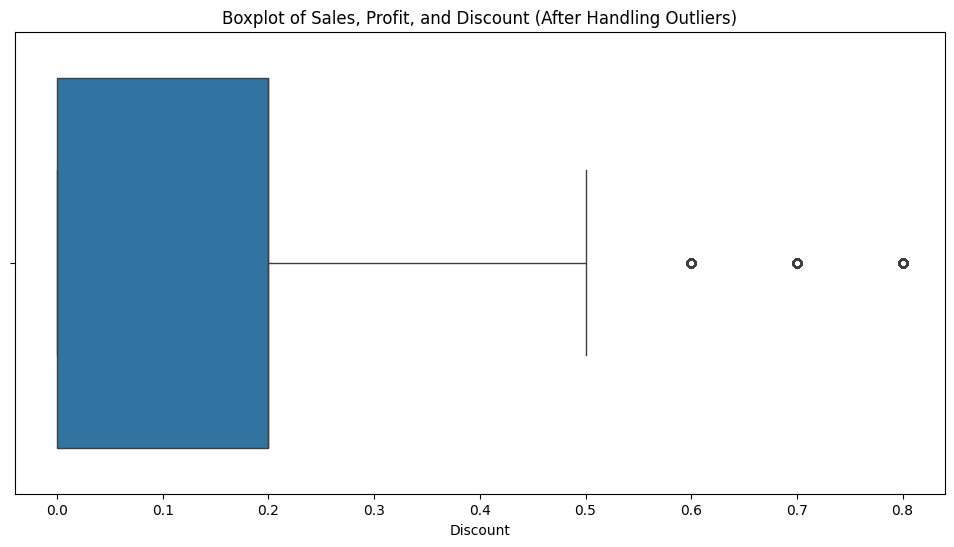

In [27]:
# Step 7: Display summary statistics after handling outliers
print(df[num_cols].describe())

# Step 8: Visualize boxplots again after capping
for col in num_cols:    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col], orient="h")
    plt.title("Boxplot of Sales, Profit, and Discount (After Handling Outliers)")
    plt.show()

# Section 5

Creating new columns

In [28]:
# Calculating delivery times
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [29]:
# Calculating profit margin
df['Profit Margin'] = df['Profit'] / df['Sales']

In [30]:
# Caculate total discount effect
df['Total Discount Effect'] = df['Quantity'] * df['Discount']

In [31]:
# Adding month column in order to analyse trends easier later
df["Order Month"] = df["Order Date"].dt.to_period("M")

In [32]:
# Checking if all new columns were added correctly
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Delivery Time,Profit Margin,Total Discount Effect,Order Month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.913600,3,0.160000,0.00,2016-11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.582000,3,0.300000,0.00,2016-11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.871400,4,0.470000,0.00,2016-06
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-319.264953,7,-0.333409,2.25,2015-10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.516400,7,0.112500,0.40,2015-10


# Section 6

Saving cleaned data to new file

In [33]:
# Saving cleaned data to a new csv file in the cleaned_data folder
df.to_csv("Cleaned_data/superstore_cleaned.csv", index=False)